In [2]:
import cv2
import matplotlib.pyplot as plt
from ex1_utils import gausssmooth
import numpy as np
from ex2_utils import *

In [62]:
def mean_shift(fun, h, x_start=None, y_start=None, N_iterations = 100):
    width, height = fun.shape
    
    img = np.pad(fun, h, "constant", constant_values=(0))
    patch = np.zeros((1))
    h_side = int((h-1)/2)

    kernel = gausssmooth

    past_coordinates = []
    
    if x_start == None or y_start == None:
        while np.sum(patch) == 0:
            x = np.random.randint(0, width) + h
            y = np.random.randint(0, height) + h

            x_min = x - h_side
            x_max = x + h_side
            y_min = y - h_side
            y_max = y + h_side

            patch = img[y_min:y_max+1, x_min:x_max+1]
    
    else:
        x = x_start + h
        y = y_start + h

    plt.matshow(fun)
    plt.plot(x - h, y - h, "ro", markersize=2)
    i = 1

    x_new = None
    y_new = None
    while True:
    
        x_min = x - h_side
        x_max = x + h_side
        y_min = y - h_side
        y_max = y + h_side

        patch = img[y_min:y_max+1, x_min:x_max+1]
    
        rows = []
        for _ in range(h):
            rows.append([x for x in range(-h_side, h_side+1)])

        x_diffs = np.array(rows)
        y_diffs = x_diffs.T

        x_diffs = (x_diffs/h)**2
        y_diffs = (y_diffs/h)**2

        #x_diffs = gausssmooth(x_diffs, 0.75)
        #y_diffs = gausssmooth(y_diffs, 0.75)

        #need kernel

        x_coords = np.tile(np.arange(x_min, x_max+1), (h, 1))
        y_coords = np.tile(np.arange(y_min, y_max+1), (h, 1)).T

        x_new = int(round(np.sum(x_coords * -x_diffs * patch) / np.sum(-x_diffs * patch)))
        y_new = int(round(np.sum(y_coords * -y_diffs * patch) / np.sum(-y_diffs * patch)))
        
        if (x_new == x) and (y_new == y) or N_iterations <= i:
            plt.plot(x_new - h, y_new - h, "gx")
            return x_new - h, y_new - h
        
        i += 1
        plt.plot(x_new - h, y_new - h, "ro", markersize=2)
        past_coordinates.append([x,y])
            
        x = x_new
        y = y_new
    
            
    

In [4]:
def generate_responses_2():
    responses = np.zeros((100, 100), dtype=np.float32)
    responses[30, 30] = 1.0
    responses[70, 70] = 1.0
    responses[50, 50] = 0.6
    return gausssmooth(responses, 8)

(51, 69)


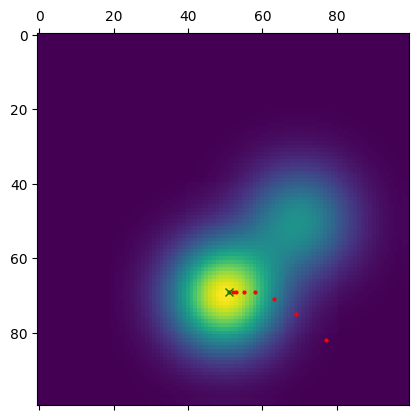

In [28]:
response = generate_responses_1()
print(mean_shift(response, 21))

# Workspace for tracker design

In [6]:
class Tracker():
    def __init__(self, params):
        self.parameters = params

    def initialize(self, image, region):
        raise NotImplementedError

    def track(self, image):
        raise NotImplementedError

25


(27, 26)

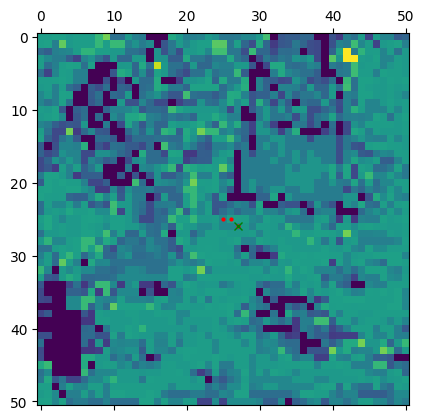

In [ ]:
img = cv2.imread("bolt/00000001.jpg")

patch = get_patch(img, (360, 200), (51, 51))[0]
ker = create_epanechnik_kernel(50, 50, 2)
hist_q = extract_histogram(patch, 16, ker)
hist_q_normalized = hist_q / np.sum(hist_q)
img2 = cv2.imread("bolt/00000002.jpg")


patch2 = get_patch(img2, (360, 200), (51, 51))[0]
ker2 = create_epanechnik_kernel(50, 50, 2)
hist_p = extract_histogram(patch2, 16, ker)
hist_p_normalized = hist_p / np.sum(hist_p)

v = np.sqrt(hist_q_normalized/(hist_p_normalized + 1e-3))
back_p = backproject_histogram(patch2, v, 16)
x = back_p.shape[0] // 2
y = back_p.shape[1] // 2
mean_shift(back_p, 21, x_start=x, y_start=y, N_iterations=20)


(20, 40)

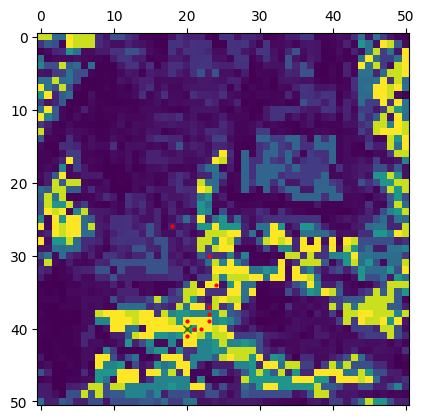

In [36]:
mean_shift(back_p, 21, 1000)

In [ ]:
width = 61
height = 25

x_range = np.arange(-width // 2, width // 2 + 1)  # Width range
y_range = np.arange(-height // 2, height // 2 + 1)  # Height range

x_diffs, y_diffs = np.meshgrid(x_range, y_range)

print(61//2)

30
